<h2> Install the necessary packages and import some tools </h2>

In [1]:
# !pip install kagglehub -q

# -q  to hide the message

Special thanks to Aisah Alfiyatus R. S.Kom for the materials, inspiration, and guidance, in teaching us about EDA and data cleaning.

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [3]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\internet_service_churn.csv\internet_service_churn.csv")

In [4]:
data

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


<h2> Take a look at the data </h2>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [6]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [7]:
data[data.duplicated(subset=['id'], keep=False)]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


In [8]:
# reveal the churn distribution
data['churn'].value_counts(normalize=True).round(2)*100

churn
1    55.0
0    45.0
Name: proportion, dtype: float64

<h3> Formatting </h3>

In [9]:
cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'churn']

data[cols] = data[cols].replace({1: 'Yes', 0: 'No'})

In [10]:
data

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,Yes,No,11.95,25,0.14,0,8.4,2.3,0,No
1,18,No,No,8.22,0,NaN,0,0.0,0.0,0,Yes
2,23,Yes,No,8.91,16,0.00,0,13.7,0.9,0,Yes
3,27,No,No,6.87,21,NaN,1,0.0,0.0,0,Yes
4,34,No,No,6.39,0,NaN,0,0.0,0.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,Yes,Yes,0.09,0,1.25,0,0.0,0.0,0,Yes
72270,1689676,Yes,No,0.06,1,1.63,0,0.8,0.0,0,Yes
72271,1689679,Yes,No,0.02,0,2.19,0,1.5,0.2,0,Yes
72272,1689733,No,No,0.01,0,0.72,0,0.0,0.0,0,Yes


<h2> The Ourlier Detection and Removal </h2>

There is an outlier in the 'subscription_age' column where the value is negative. 

In [11]:
data.describe()

,id,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,7.227400e+04,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000
mean,8.463182e+05,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613
std,4.891022e+05,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123
min,1.500000e+01,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000
50%,8.477840e+05,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000
75%,1.269562e+06,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000
max,1.689744e+06,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


In [12]:
data[data['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,No,No,-0.02,0,0.08,0,32.6,1.3,0,Yes


In [13]:
data1 = data.copy()
# copt to makesure the original copy stay safe

In [14]:
data1 = data[data['subscription_age'] >= 0]

In [15]:
data1.describe()
# no more -2 or outlier

,id,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,7.227300e+04,72273.000000,72273.000000,50701.000000,72273.000000,71892.000000,71892.000000,72273.000000
mean,8.463075e+05,2.450085,18.942745,0.716052,0.274238,43.690066,4.192116,0.207616
std,4.890971e+05,2.034983,13.215290,0.697103,0.816626,63.406391,9.818959,0.997130
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222160e+05,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000
50%,8.477820e+05,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000
75%,1.269553e+06,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000
max,1.689744e+06,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


<h2> Handling nulls </h2>

In [16]:
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [17]:
data1[data1.isnull().any(axis=1)]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,18,No,No,8.22,0,NaN,0,0.0,0.0,0,Yes
3,27,No,No,6.87,21,NaN,1,0.0,0.0,0,Yes
4,34,No,No,6.39,0,NaN,0,0.0,0.0,0,Yes
7,84,No,No,5.48,14,NaN,1,0.0,0.0,0,Yes
8,94,No,No,8.54,0,NaN,0,0.0,0.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
72249,1689246,Yes,No,0.10,16,NaN,0,11.4,0.9,0,Yes
72259,1689452,No,No,0.07,25,NaN,0,70.7,6.6,0,Yes
72263,1689530,Yes,No,0.02,0,NaN,0,0.0,0.0,0,Yes
72264,1689533,No,No,0.01,0,NaN,0,0.0,0.0,0,Yes


In [18]:
data1[data1['download_avg'].isna() & data1['upload_avg'].isna()]

# both download avg and upload avg, have missing value at the same time or row

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
25,617,No,No,11.93,21,NaN,0,NaN,NaN,0,No
52,1151,No,No,11.93,24,NaN,0,NaN,NaN,0,No
54,1169,Yes,Yes,11.93,24,NaN,0,NaN,NaN,0,No
63,1413,No,No,11.93,24,NaN,0,NaN,NaN,0,No
85,1805,No,No,11.93,24,NaN,0,NaN,NaN,0,No
...,...,...,...,...,...,...,...,...,...,...,...
71835,1680161,Yes,No,0.00,0,1.87,0,NaN,NaN,0,No
71836,1680174,Yes,Yes,0.00,0,1.97,0,NaN,NaN,0,No
71837,1680212,Yes,Yes,0.00,0,1.97,0,NaN,NaN,0,No
71838,1680257,Yes,Yes,0.00,0,1.97,0,NaN,NaN,0,No


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  object 
 2   is_movie_package_subscriber  72274 non-null  object 
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 6.1+ MB


<h4> since this is just for eda and training purpose, we will fill nulls with median for numerical columns and mode for categorical columns </h4>

In [20]:
for col in data1.columns:
    if data1[col].dtype == 'object':
        data1[col] = data1[col].fillna(data1[col].mode()[0])
    else:
        data1[col] = data1[col].fillna(data1[col].median())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2355919796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = data1[col].fillna(data1[col].median())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2355919796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = data1[col].fillna(data1[col].mode()[0])


In [21]:
data1.info()

# now it is all clear, no null detected

<class 'pandas.core.frame.DataFrame'>
Index: 72273 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72273 non-null  int64  
 1   is_tv_subscriber             72273 non-null  object 
 2   is_movie_package_subscriber  72273 non-null  object 
 3   subscription_age             72273 non-null  float64
 4   bill_avg                     72273 non-null  int64  
 5   reamining_contract           72273 non-null  float64
 6   service_failure_count        72273 non-null  int64  
 7   download_avg                 72273 non-null  float64
 8   upload_avg                   72273 non-null  float64
 9   download_over_limit          72273 non-null  int64  
 10  churn                        72273 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 6.6+ MB


<h2> Adjusting more format and removing unneccessary columns </h2>

In [22]:
data1.columns = data.columns.str.strip().str.lower()
data1

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,Yes,No,11.95,25,0.14,0,8.4,2.3,0,No
1,18,No,No,8.22,0,0.57,0,0.0,0.0,0,Yes
2,23,Yes,No,8.91,16,0.00,0,13.7,0.9,0,Yes
3,27,No,No,6.87,21,0.57,1,0.0,0.0,0,Yes
4,34,No,No,6.39,0,0.57,0,0.0,0.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,Yes,Yes,0.09,0,1.25,0,0.0,0.0,0,Yes
72270,1689676,Yes,No,0.06,1,1.63,0,0.8,0.0,0,Yes
72271,1689679,Yes,No,0.02,0,2.19,0,1.5,0.2,0,Yes
72272,1689733,No,No,0.01,0,0.72,0,0.0,0.0,0,Yes


In [23]:
data1.drop(columns='id', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\84859060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(columns='id', inplace=True)


<h2> Exploratory Data Analysis </h2>

In [48]:
data1.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2387378468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1[col], ax=ax, palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2387378468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1[col], ax=ax, palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2387378468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1[col], ax=ax, palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8296\2387378468.py:9: FutureWarning: 

Passing `

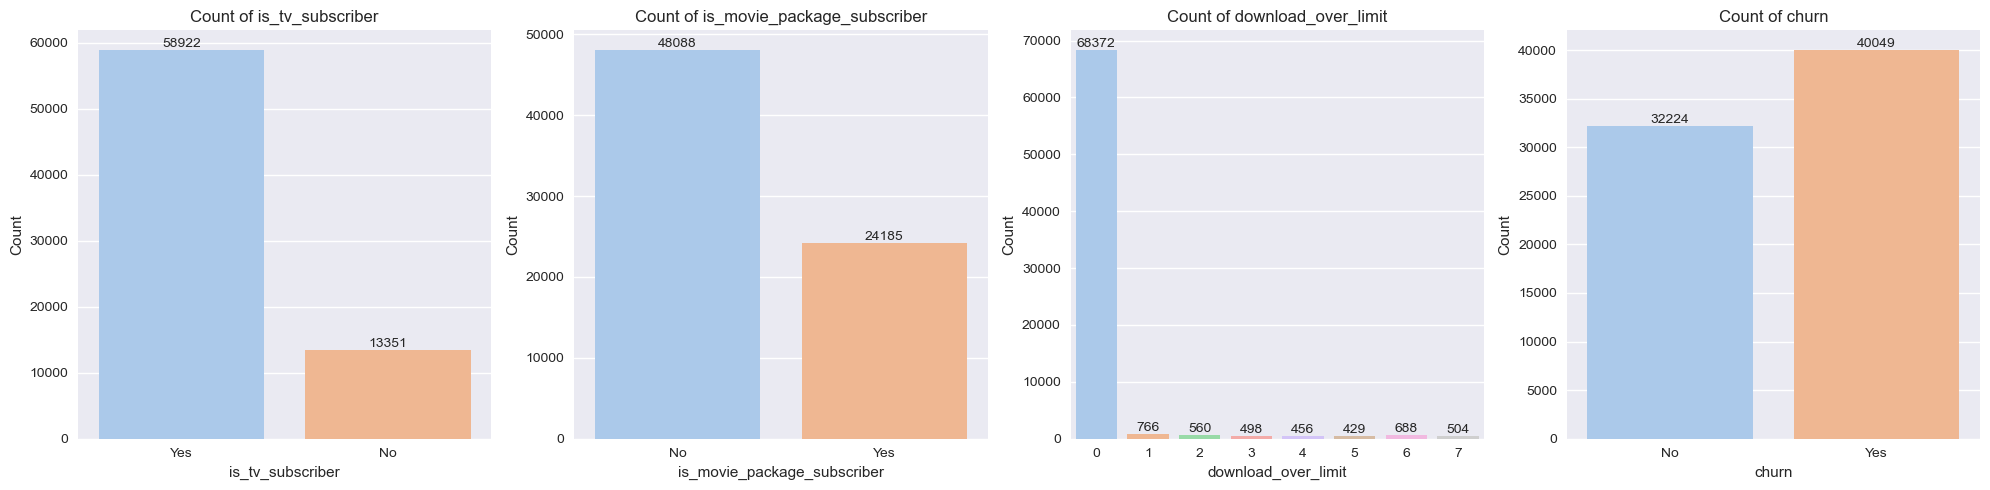

In [29]:
plt.style.use("seaborn-v0_8")


hist_cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'download_over_limit', 'churn']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for ax, col in zip(axes.flatten(), hist_cols):
    sns.countplot(x=data1[col], ax=ax, palette="pastel")
    ax.set_title(f"Count of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

In [30]:
data1.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')

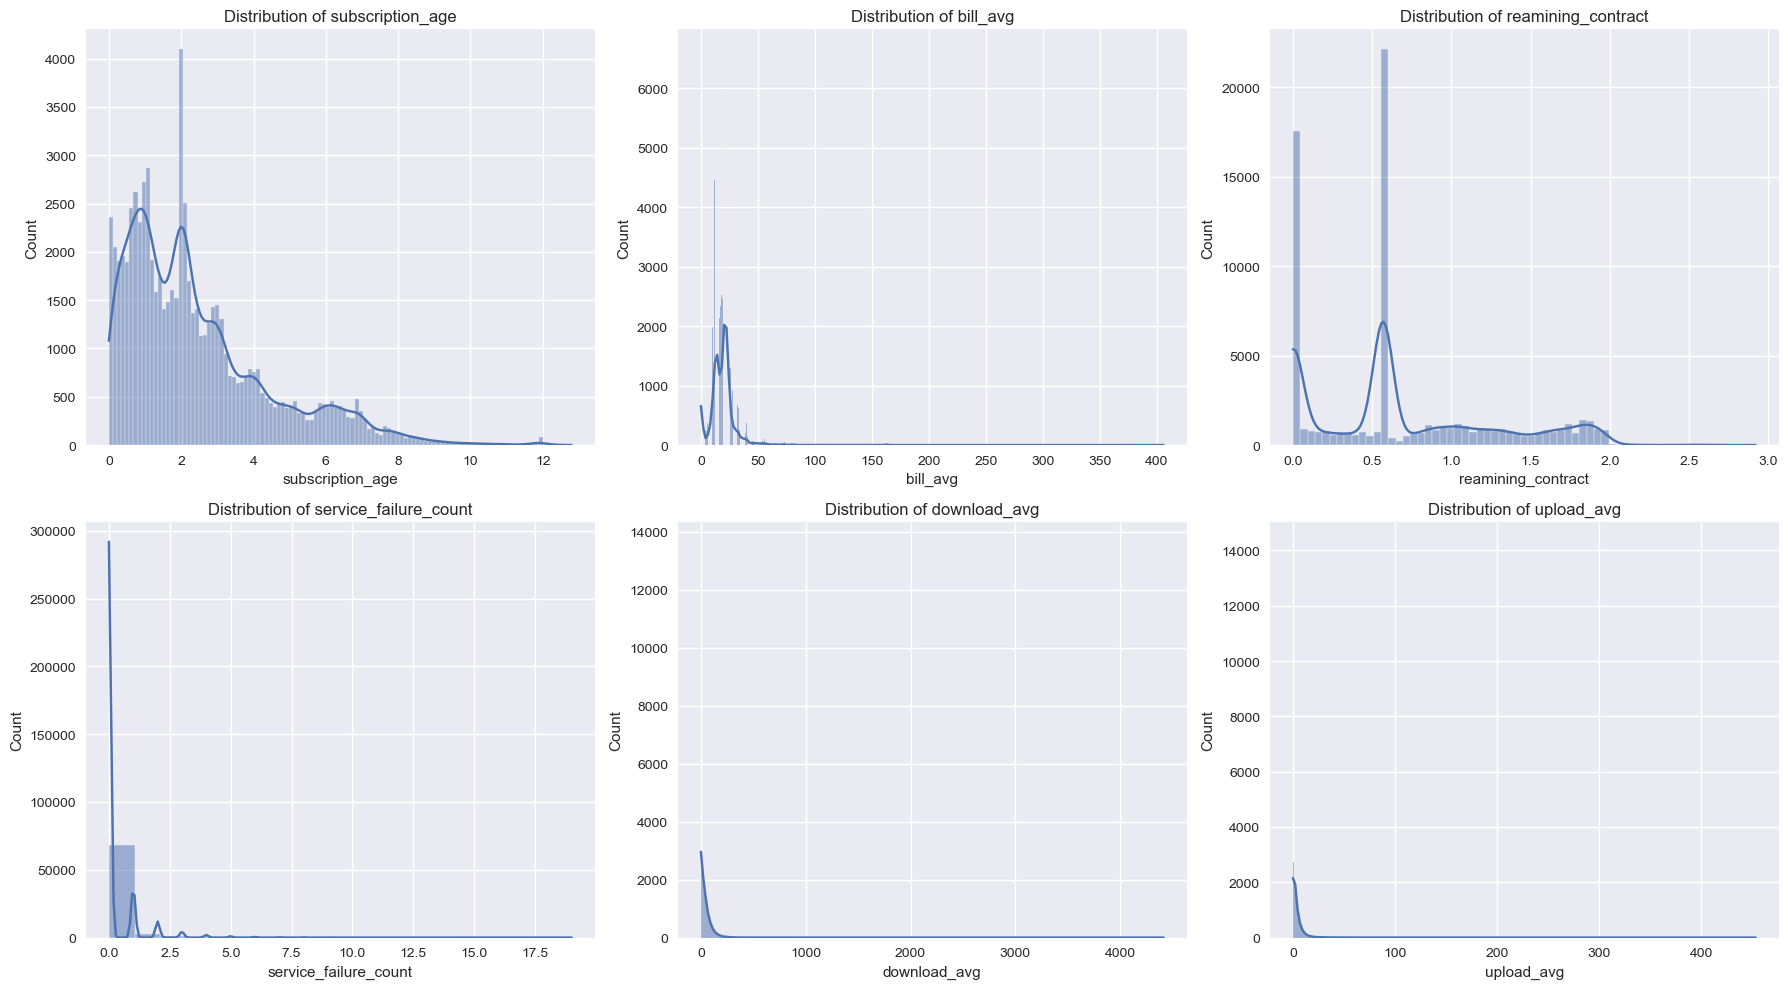

In [43]:
line_cols = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for ax, col in zip(axes.flatten(), line_cols):
    sns.histplot(data1[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()

plt.show()

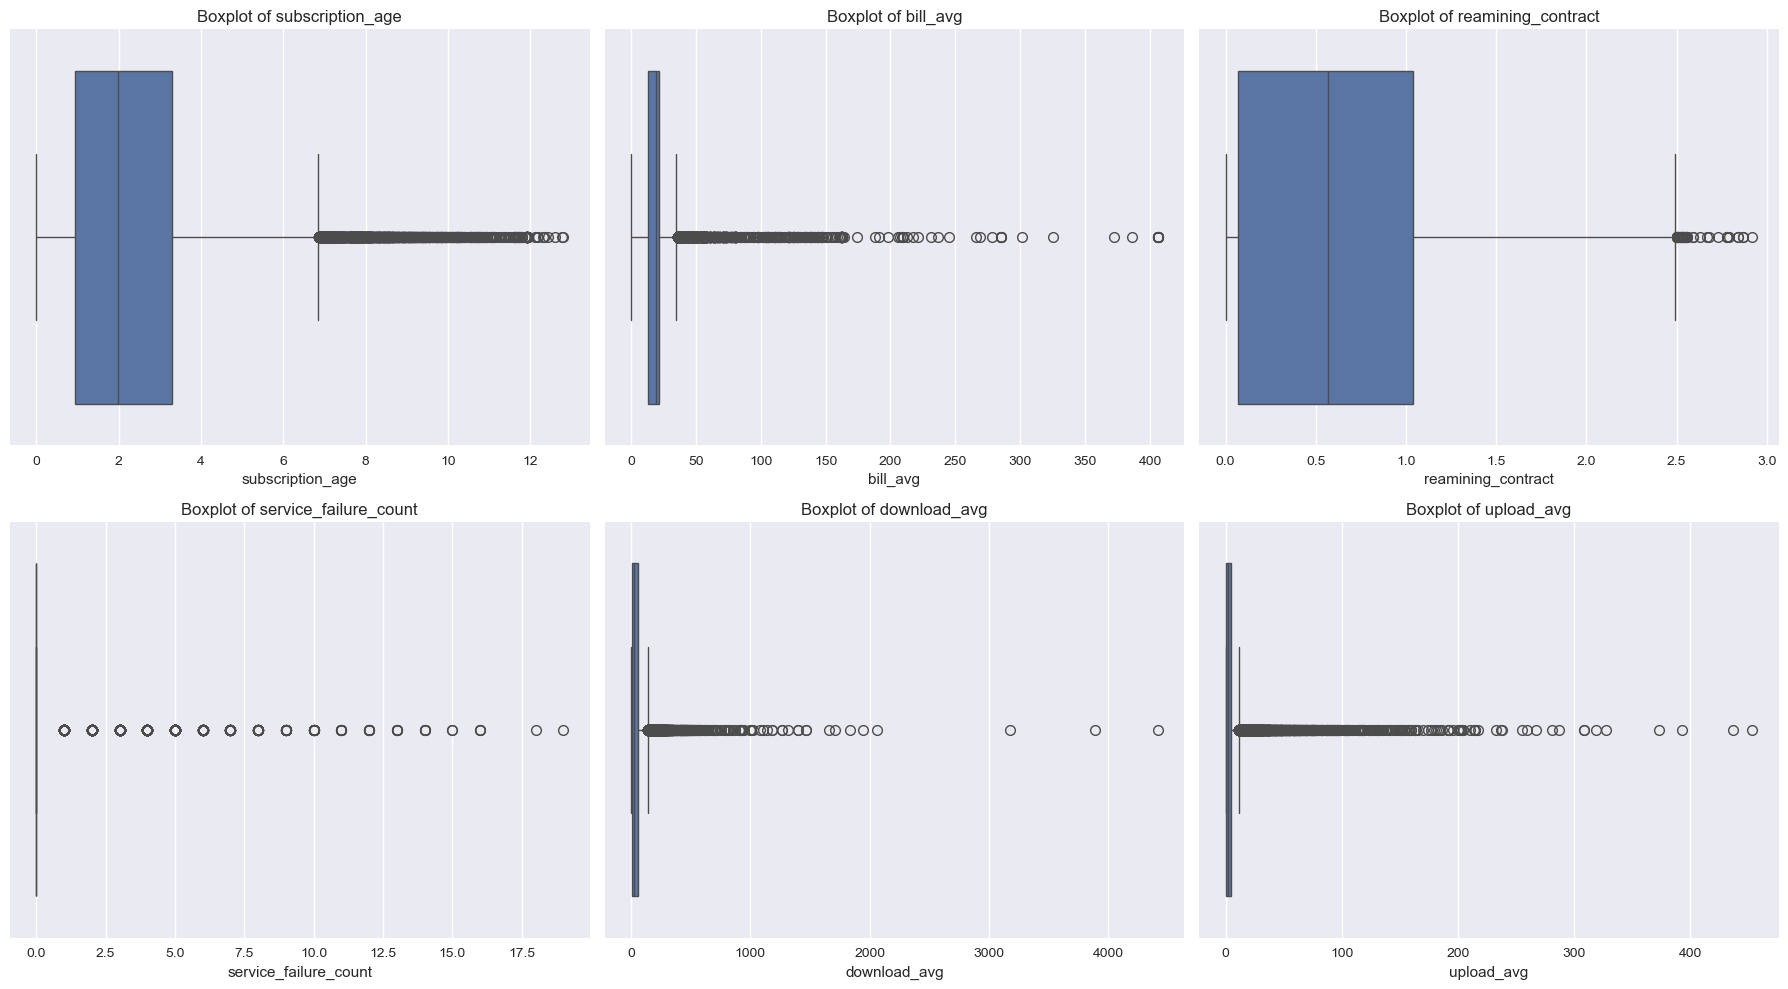

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for ax, col in zip(axes.flatten(), line_cols):
    sns.boxplot(x=data1[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()

plt.show()

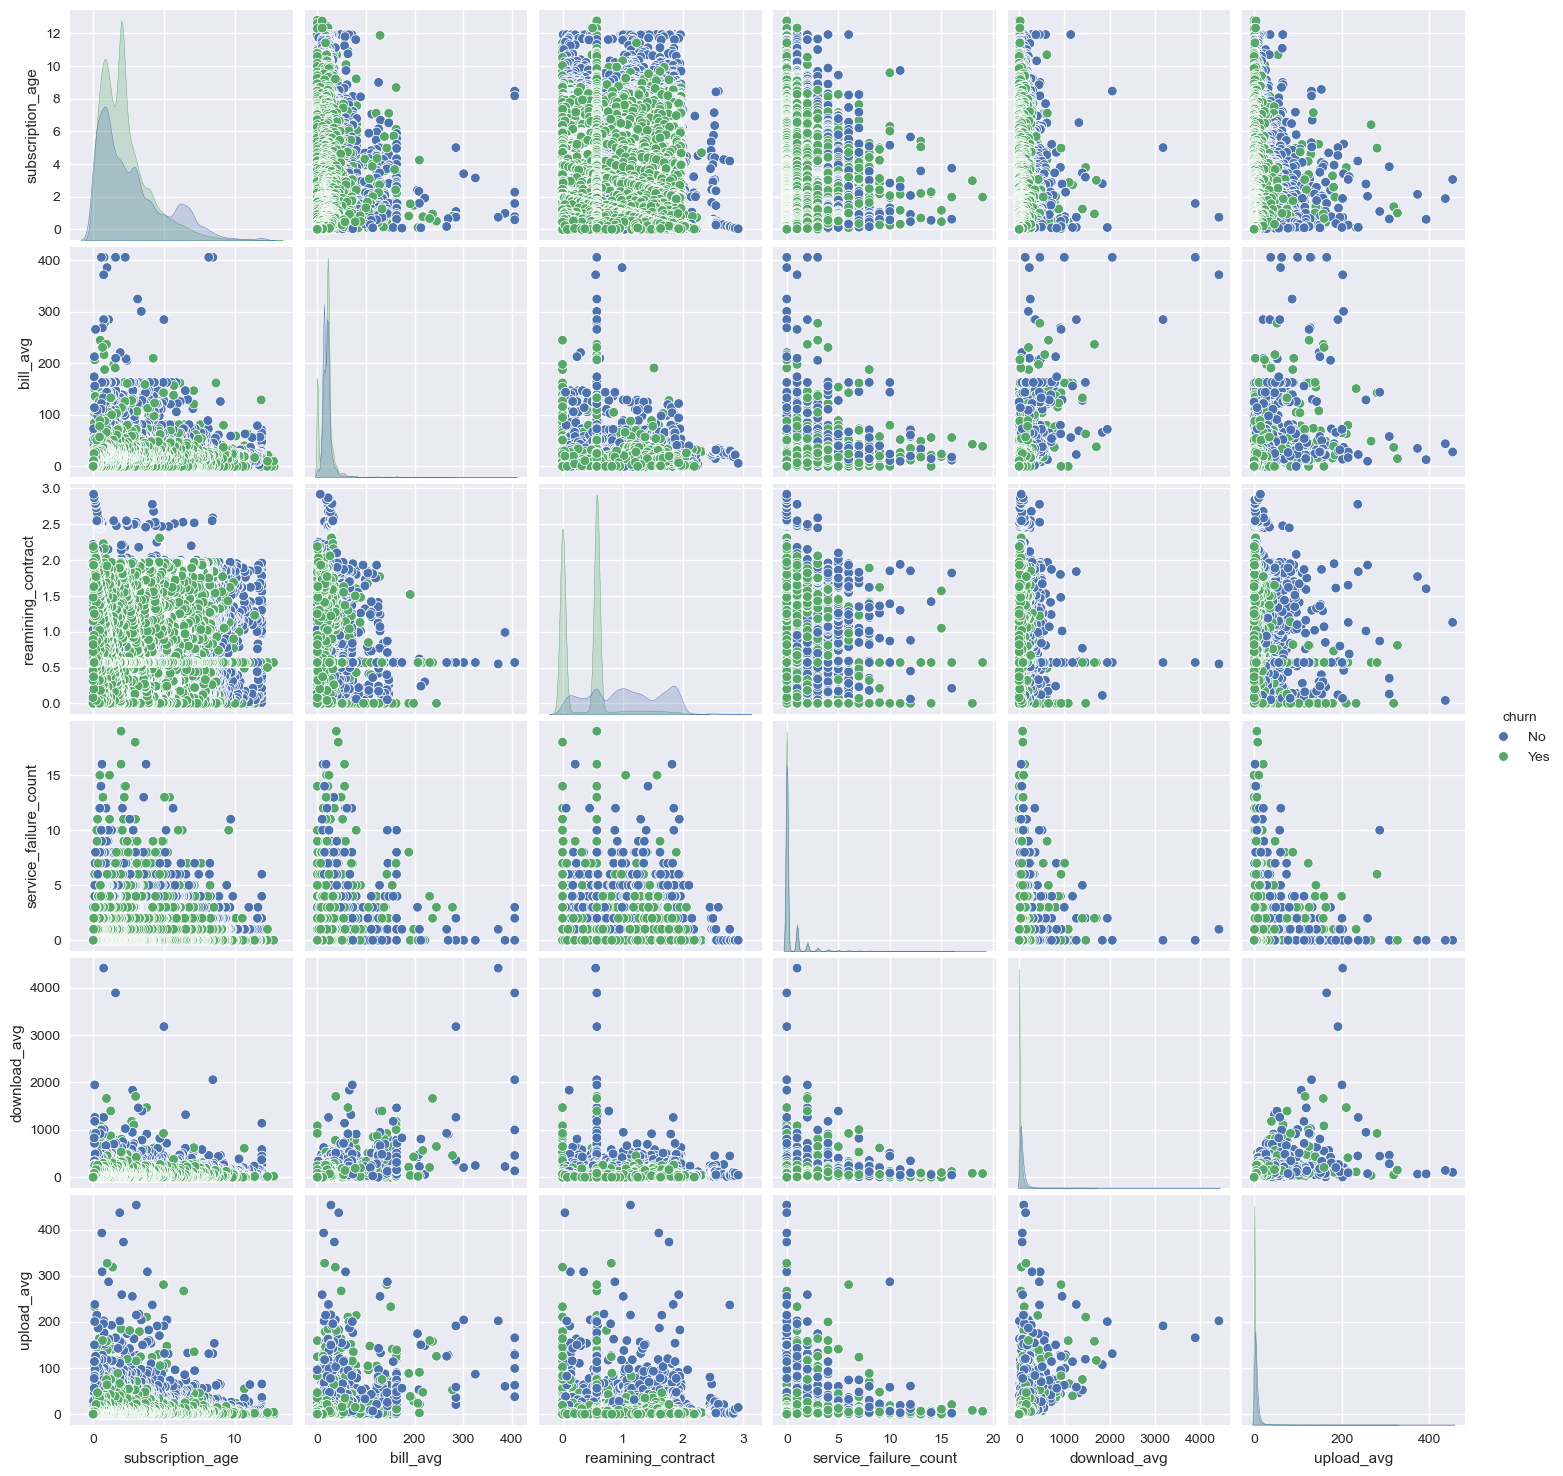

In [45]:
sns.pairplot(data1[line_cols + ["churn"]], hue="churn")

plt.show()

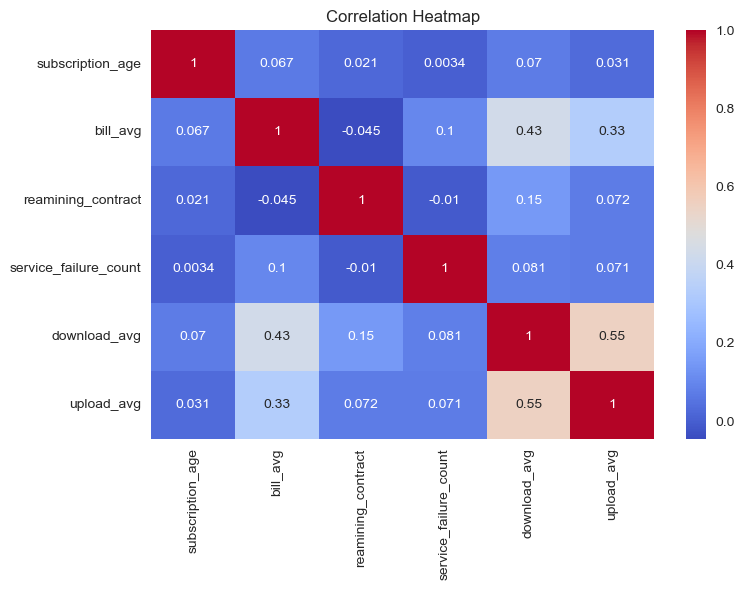

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(data1[line_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()